### Processing the data for the report

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sys_name = 'quadcopter'
#sys_name = 'manipulator'

noise_sizes = ['small', 'medium', 'large']
method_names = ['feed', 'mean', 'marg', 'cond']
print_method_names = ['iLQR$_\\text{{feed}}$', 'MPC$_\\text{{mean}}$', 'MPC$_\\text{{marg}}$', 'MPC$_\\text{{cond}}$']
field_names = ['xs', 'us', 'x_ref_set', 'x_output_set', 'cost', 'noise', 'cost_goal', 'cost_control']

In [4]:
#noise: 0.5, 1.5, 3
data = np.load('data/ilqr_'+sys_name+'11_varying.npy', allow_pickle=True)[()]
cost_small = []
cost_medium = []
cost_large = []
for i, method_name in enumerate(method_names):
    cost_small  += [data['small'][method_name]['cost']]
    cost_medium += [data['medium'][method_name]['cost']]
    cost_large  += [data['large'][method_name]['cost']]
cost_small = np.array(cost_small)
cost_medium = np.array(cost_medium)
cost_large = np.array(cost_large)
status_large = np.isnan(cost_large).astype(np.float32)
cost_large = np.nan_to_num(cost_large) + status_large*1e5

#normalize
cost_small_min = np.min(cost_small, axis=0)
cost_small_norm = cost_small/cost_small_min

cost_medium_min = np.min(cost_medium, axis=0)
cost_medium_norm = cost_medium/cost_medium_min

cost_large_min = np.min(cost_large, axis=0)
cost_large_norm = cost_large/cost_large_min

In [5]:
for i in range(len(method_names)):
    print('& ' + print_method_names[i] +' & {0:.2f}  $\pm$ {1:.2f}  &  {2:.2f}  $\pm$  {3:.1f} & {4:.2f}  $\pm$ {5:.1f} \\\\'.format(
        np.mean(cost_small_norm[i]), np.std(cost_small_norm[i]), np.mean(cost_medium_norm[i]), np.std(cost_medium_norm[i]), np.mean(cost_large_norm[i]), np.std(cost_large_norm[i])))

& iLQR$_\text{{feed}}$ & nan  $\pm$ nan  &  nan  $\pm$  nan & 2.98  $\pm$ 3.1 \\
& MPC$_\text{{mean}}$ & nan  $\pm$ nan  &  nan  $\pm$  nan & 6.02  $\pm$ 3.2 \\
& MPC$_\text{{marg}}$ & nan  $\pm$ nan  &  nan  $\pm$  nan & 1.18  $\pm$ 0.2 \\
& MPC$_\text{{cond}}$ & nan  $\pm$ nan  &  nan  $\pm$  nan & 1.22  $\pm$ 0.4 \\


/home/teguh/.local/lib/python2.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/teguh/.local/lib/python2.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/teguh/.local/lib/python2.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/teguh/.local/lib/python2.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/teguh/.local/lib/python2.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [5]:
for i in range(len(method_names)):
    print('& ' + print_method_names[i] +' & {0:.2f}  $\pm$ {1:.2f}  &  {2:.2f}  $\pm$  {3:.1f} & {4:.2f}  $\pm$ {5:.1f} \\\\'.format(
        np.mean(cost_small_norm[i]), np.std(cost_small_norm[i]), np.mean(cost_medium_norm[i]), np.std(cost_medium_norm[i]), np.mean(cost_large_norm[i]), np.std(cost_large_norm[i])))

& iLQR$_\text{{feed}}$ & 1.00  $\pm$ 0.00  &  1.00  $\pm$  0.0 & 1.00  $\pm$ 0.0 \\
& MPC$_\text{{mean}}$ & 1.02  $\pm$ 0.00  &  1.03  $\pm$  0.0 & 1.05  $\pm$ 0.0 \\
& MPC$_\text{{marg}}$ & 1.02  $\pm$ 0.00  &  1.03  $\pm$  0.0 & 1.06  $\pm$ 0.0 \\
& MPC$_\text{{cond}}$ & 1.01  $\pm$ 0.00  &  1.01  $\pm$  0.0 & 1.01  $\pm$ 0.0 \\


In [59]:
.01#noise: 0.2, 0.7, 1.2
data = np.load('data/ilqr_'+sys_name+'4.npy', allow_pickle=True)[()]
cost_small = []
cost_medium = []
cost_large = []
for i, method_name in enumerate(method_names):
    cost_small  += [data['small'][method_name]['cost']]
    cost_medium += [data['medium'][method_name]['cost']]
    cost_large  += [data['large'][method_name]['cost']]
cost_small = np.array(cost_small)
cost_medium = np.array(cost_medium)
cost_large = np.array(cost_large)

#normalize
cost_small_min = np.min(cost_small, axis=0)
cost_small_norm = cost_small/cost_small_min

cost_medium_min = np.min(cost_medium, axis=0)
cost_medium_norm = cost_medium/cost_medium_min

cost_large_min = np.min(cost_large, axis=0)
cost_large_norm = cost_large/cost_large_min

In [60]:
for i in range(len(method_names)):
    print('& ' + print_method_names[i] +' & {0:.2f}  $\pm$ {1:.1f}  &  {2:.2f}  $\pm$  {3:.1f} & {4:.2f}  $\pm$ {5:.1f} \\\\'.format(
        np.mean(cost_small_norm[i]), np.std(cost_small_norm[i]), np.mean(cost_medium_norm[i]), np.std(cost_medium_norm[i]), np.mean(cost_large_norm[i]), np.std(cost_large_norm[i])))

& iLQR$_\text{{feed}}$ & 1.00  $\pm$ 0.0  &  1.10  $\pm$  0.3 & 1.28  $\pm$ 0.6 \\
& MPC$_\text{{mean}}$ & 1.48  $\pm$ 0.1  &  2.58  $\pm$  1.0 & 3.30  $\pm$ 1.0 \\
& MPC$_\text{{marg}}$ & 1.26  $\pm$ 0.0  &  1.23  $\pm$  0.1 & 1.30  $\pm$ 0.2 \\
& MPC$_\text{{cond}}$ & 1.08  $\pm$ 0.0  &  1.05  $\pm$  0.0 & 1.09  $\pm$ 0.2 \\


***

## Visualize the quadcopter

In [5]:
import numpy as np
import pybullet as p
import pybullet_data
import matplotlib.pyplot as plt

import time

from utils import *
from casadi import *
import crocoddyl
from costs import *
from ocp_sys import QuadcopterCasadi, ActionDataRobot, ActionModelRobot
from IPython.display import clear_output
from ocp import ILQR_Standard, get_ilqr_from_ddp
from mixture_model import Gaussian
np.set_printoptions(precision=3, suppress=True)
%load_ext autoreload
%autoreload 2

### Configure pybullet

In [6]:
# configure pybullet and load plane.urdf and quadcopter.urdf
physicsClient = p.connect(p.GUI, options='--background_color_red=.6 --background_color_green=.6 --background_color_blue=.6')
p.configureDebugVisualizer(p.COV_ENABLE_GUI,0)
p.setAdditionalSearchPath(pybullet_data.getDataPath())

In [13]:
p.resetSimulation()

#### Load robot model

In [14]:
color_path = [1,1,1,.4]
color_ref_cond = [.95,.95,0,.8]
color_ref_mean = [0,.9,.9,.5]
color_robot = [1,.3,0,1]
color_current = [0,.9,0,1]
color_obstacle = [.1,.1,.1,.9]
color_target = [1,1,1,0.]

In [15]:
robotId_current = p.loadURDF("../files/quadrotor.urdf",[0,0,1],p.getQuaternionFromEuler([0,0,0]))

for i in range((p.getNumJoints(robotId_current))+1):
    p.changeVisualShape(robotId_current, i-1, rgbaColor=color_current)


In [16]:
robotId = p.loadURDF("../files/quadrotor.urdf",[0,0,1],p.getQuaternionFromEuler([0,0,0]))

for i in range((p.getNumJoints(robotId))+1):
    p.changeVisualShape(robotId, i-1, rgbaColor=color_robot)

_,_,target_id = create_primitives(p.GEOM_BOX, halfExtents=[0.1, 0.1, 0.1], rgbaColor=color_target)
_,_,waypoint_id = create_primitives(p.GEOM_BOX, halfExtents=[0.1, 0.1, 0.1], rgbaColor=color_target)
_,_,waypoint_id2 = create_primitives(p.GEOM_BOX, halfExtents=[0.1, 0.1, 0.1], rgbaColor=color_target)

#### Load multiple spheres

In [17]:
pos_obs_set = [np.array([0, 2., 2.]),np.array([2., 2., 2.]), np.array([-2., 2., 2.]), np.array([1, 4., 2.]),  np.array([-1., 4., 2.]), ] 
#pos_obs_set = [np.array([0, 2., 2.]),np.array([2, 2., 2.]), np.array([-2, 2., 2.])]#, np.array([1, 4., 2.]),  np.array([-1, 4., 2.]), ] 
r_body = 0.35
r_obs = 0.4
margin = 0.1

w_obstacle = 1000

ballIds = []
cost_collisions = []
for pos_obs in pos_obs_set:
    _,_,ballid = create_primitives(radius = r_obs)
    p.changeVisualShape(ballid, -1, rgbaColor=color_obstacle)
    p.resetBasePositionAndOrientation(ballid, pos_obs, (0,0,0,1))
    ballIds += [ballid]
    col_activation = ActivationCollision(nr = 3, threshold = r_body + r_obs + margin)
    cost_collision_i = SphereSphereCollisionCost(col_activation, nu = 4, r_body = r_body, r_obs = r_obs, pos_obs = pos_obs, w = w_obstacle)
    cost_collisions += [cost_collision_i]

#### Define the robot_sys

In [18]:
from ocp_sys import Bicopter

In [19]:
sys_name = 'quadcopter' #the choices: ['quadcopter', 'bicopter', 'pendulum']

use_collision = True

if sys_name == 'quadcopter':
    T = 150
    dt = 0.05
    robot_sys = QuadcopterCasadi(dt = dt)
    T_short = 30
    n_iter_short = 5
elif sys_name == 'bicopter':
    T = 150
    dt = 0.05
    T_short = 30
    n_iter_short = 10
    robot_sys = Bicopter(dt = dt)

In [20]:
cost_collision = CostModelSum(robot_sys, cost_collisions)

In [21]:
#### Load multiple robots for visualization
robotIds = []
for t in range(T):
    _,_,rob_id = create_primitives(radius = 0.05)
    #robotIds += [p.loadURDF("../files/quadrotor.urdf",[0,0,1],p.getQuaternionFromEuler([0,0,0]))]
    robotIds += [rob_id]
    p.changeVisualShape(rob_id, -1, rgbaColor=color_path)
        

In [22]:
# for visualizing the reference
robotIdRefs = []
for t in range(T_short):
    #robotIdRefs += [p.loadURDF("../files/quadrotor.urdf",[0,0,1],p.getQuaternionFromEuler([0,0,0]))]
    _,_,rob_id = create_primitives(radius = 0.05)
    robotIdRefs += [rob_id]

    for i in range((p.getNumJoints(robotIdRefs[-1]))+1):
        p.changeVisualShape(robotIdRefs[-1], i-1, rgbaColor=color_ref_cond)
        

In [23]:
# for visualizing the reference
robotIdRefMeans = []
for t in range(T_short):
#    robotIdRefMeans += [p.loadURDF("../files/quadrotor.urdf",[0,0,1],p.getQuaternionFromEuler([0,0,0]))]
    _,_,rob_id = create_primitives(radius = 0.05)
    robotIdRefMeans += [rob_id]
    for i in range((p.getNumJoints(robotIdRefMeans[-1]))+1):
        p.changeVisualShape(robotIdRefMeans[-1], i-1, rgbaColor=color_ref_mean)

# 1. Plan using iLQR with long horizon

#### Setting cost

In [24]:
if sys_name == 'quadcopter':
    x_waypoint = np.array([-1.,2.,2.,0,0,0,0,0,0,0,0,0])
    T_waypoint = 60
    x_waypoint2 = np.array([0,4.,2.,0,0,0,0,0,0,0,0,0])
    T_waypoint2 = 100
    x_ref = np.array([0,7.,2.,0,0,0,0,0,0,0,0,0]) #for quadcopter
    p.resetBasePositionAndOrientation(target_id, x_ref[:3], (0,0,0,1))
    p.resetBasePositionAndOrientation(waypoint_id, x_waypoint[:3], (0,0,0,1))
    p.resetBasePositionAndOrientation(waypoint_id2, x_waypoint2[:3], (0,0,0,1))
    Q = np.eye(robot_sys.Dx)*.1
    Qf = np.eye(robot_sys.Dx)*1000
    R = np.eye(robot_sys.Du)*.1
elif sys_name == 'bicopter':
    x_ref = np.array([3,3,0,0,0,0]) #for bicopter
    Q = np.eye(robot_sys.Dx)*.1
    #Q[2:,2:] = 0*Q[2:,2:] 
    Qf = np.eye(robot_sys.Dx)*100
    #Qf[2:,2:] = 0*Qf[2:,2:] 
    R = np.eye(robot_sys.Du)*1.
    
costs = []
for i in range(T):
    if i <= T_waypoint:
        cur_ref = x_waypoint.copy()
    elif i <= T_waypoint2:
         cur_ref = x_waypoint2.copy()        
    else:
        cur_ref = x_ref.copy()
    if i == T_waypoint or i == T_waypoint2: 
        Q_cur = 0.1*Qf.copy()
        Q_cur[3:6,3:6] *= 0
        Q_cur[9:,9:] *= 0
    else:
        Q_cur = Q.copy()
    runningStateCost = CostModelQuadratic(robot_sys, Q_cur, x_ref = cur_ref)
    runningControlCost = CostModelQuadratic(robot_sys, None, R)
    if use_collision:
        runningCost = CostModelSum(robot_sys, [runningStateCost, runningControlCost, cost_collision])
    else:
        runningCost = CostModelSum(robot_sys, [runningStateCost, runningControlCost])        
    costs += [runningCost]

#### Setup crocoddyl model
rmodels = []
for i in range(T):
    state = crocoddyl.StateVector(robot_sys.Dx)
    rmodel = ActionModelRobot(state, robot_sys.Du)
    rmodel.init_robot_sys(robot_sys, nr = robot_sys.Dx)
    rmodel.set_cost(costs[i])
    rmodels += [rmodel]

terminalStateCost = CostModelQuadratic(robot_sys,Qf, x_ref = x_ref)
terminalControlCost = CostModelQuadratic(robot_sys, None,R)
if use_collision:
    terminalCost = CostModelSum(robot_sys, [terminalStateCost, terminalControlCost, cost_collision])
else:
    terminalCost = CostModelSum(robot_sys, [terminalStateCost, terminalControlCost])

rmodel_T = ActionModelRobot(state, robot_sys.Du)
rmodel_T.init_robot_sys(robot_sys, nr = robot_sys.Dx)
rmodel_T.set_cost(terminalCost)

#### Setup problem & initial guess

In [25]:
#initial state
if sys_name == 'quadcopter':
    x0 = np.array([ 0.,  0., 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])
    us = np.zeros((T, robot_sys.Du))
elif sys_name == 'bicopter':
    x0 = np.zeros(6)
    u_shift = 9.8*robot_sys.m/2
    us = np.ones((T, robot_sys.Du))*u_shift

robot_sys.set_init_state(x0)
xs = robot_sys.rollout(us)
problem = crocoddyl.ShootingProblem(x0, rmodels, rmodel_T)

#### Solve

In [26]:
ddp = crocoddyl.SolverFDDP(problem)

ddp.th_grad = 1e-6
ddp.th_stop = 1e-6
ddp.setCallbacks([crocoddyl.CallbackVerbose()])

ddp.solve(list(xs[:,:,None]), list(us[:,:,None]), maxiter=1000)

xs_ref, us_ref = np.array(ddp.xs), np.array(ddp.us)

#### Visualize the path by multiple robots

In [27]:
if sys_name == 'quadcopter':
    for t in range(T):
        pos = xs_ref[t, :3]
        ori = euler2quat(xs_ref[t,6:9], 'rzyz')
        p.resetBasePositionAndOrientation(robotIds[t], pos, ori)

#### Select 1 experiment

In [28]:
start_t = 65
end_t = 67

In [29]:
i = 0

In [30]:
p.resetBasePositionAndOrientation(robotId, xs_ref[-1,:3], (0,0,0,1))

In [31]:
p.resetBasePositionAndOrientation(robotId_current, xs_ref[end_t,:3], (0,0,0,1))

In [32]:
28, 38, 44, 46

(28, 38, 44, 46)

In [33]:
field_names = ['xs', 'us', 'x_ref_set', 'x_output_set', 'cost', 'noise', 'cost_goal', 'cost_control']
i = 28
print(i)
lev = 'medium'
#xs = data['small'][method_name]['xs'][i]
x_ref_mean_set = data[lev]['mean']['x_ref_set'][i]
x_ref_cond_set = data[lev]['cond']['x_ref_set'][i]

for t in range(T):
    pos = xs_ref[t, :3]
    ori = euler2quat(xs_ref[t,6:9], 'rzyz')
    p.resetBasePositionAndOrientation(robotIds[t], pos, ori)

xs_ref_now = x_ref_cond_set[end_t]
for t in range(T_short):
    pos = xs_ref_now[t, :3]
    ori = euler2quat(xs_ref[t,6:9], 'rzyz')
    p.resetBasePositionAndOrientation(robotIdRefs[t], pos, ori)

xs_ref_now = x_ref_mean_set[end_t]
for t in range(T_short):
    pos = xs_ref_now[t, :3]
    ori = euler2quat(xs_ref[t,6:9], 'rzyz')
    p.resetBasePositionAndOrientation(robotIdRefMeans[t], pos, ori)

28


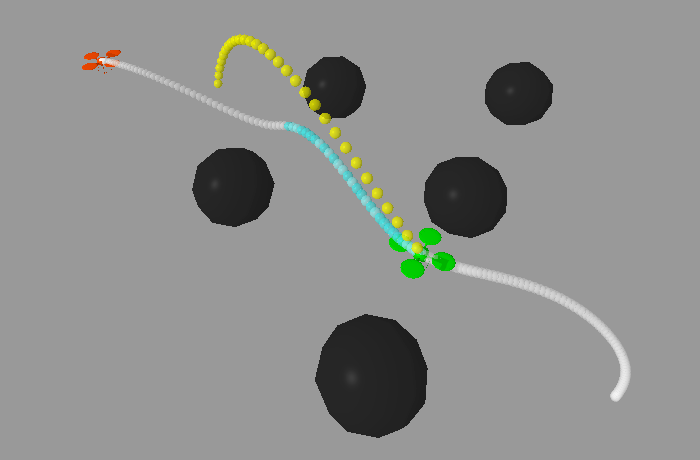

In [43]:
p.resetDebugVisualizerCamera(cameraDistance=5.5, cameraYaw=-60, 
                             cameraPitch= -40, cameraTargetPosition=np.array([0,3.5,2]))

save_screenshot(200, 420, 900, 880, 'temp/quadcopter.png')